In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
import csv
import numpy as np
plot.rc('font',family='serif')
plot.rc('xtick',labelsize=14)

In [2]:
# The database contains the results of all tennis games 
# in the pro men (ATP, from 2000 to end 2019) and women (WTA, from 2007 to end 2019) 'tours', 

# This codes reads the data
# Select the category: 'wta' for women, 'atp' for men
# For the questions of the homework, make sure to select the WTA dataset
# But you can use the ATP dataset to have fun !!
tour = 'wta'

# a setting to read the CSV files
if tour == 'atp':
    i_loser = 30
    i_winner = -2
else:
    i_loser = 21
    i_winner = -2   

N=0                  # Total number of players (will be incremented when reading the file)
player_ID = dict()   # Given a 'name', player_ID[name] gives the ID of the player
player_name=[]       # Given an 'id', player_name[id] gives the name of the player
    
# This reads the CSV file to construct N, player_ID and player_name
with open(tour+'.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        loser = row[i_loser].rstrip().replace(',','')
        winner = row[i_winner].rstrip().replace(',','')
        
        for player in [winner,loser]:
            if not player in player_ID:
                player_ID[player]=N
                player_name.append(player)
                N +=1

# Matrix of the game records: R[i,j] will contain the number of time i beat j
R=np.zeros(shape=(N,N))

# This constructs R
with open(tour+'.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)

    for row in reader:
        # each row corresponds to a game
        loser = player_ID[row[i_loser].rstrip().replace(',','')]   # ID of the loser
        winner = player_ID[row[i_winner].rstrip().replace(',','')] # ID of the winner
        R[winner,loser] += 1  # count +1 victory for the winner

In [3]:
wins = np.sum(R,axis=1)    # total number of victories
losses = np.sum(R,axis=0)  # total number of losses
N_games = wins + losses    # total number of games

In [4]:
# naive ranking: rank players by percentage of victories
ratio = wins/N_games
naive_ranking = ratio.argsort()[::-1]
naive_scores = np.sort(ratio)[::-1]

In [5]:
# Function that plots rankings
def plot_ranking(ranking,scores,n):
    y=-np.array(range(n))
    plot.figure(figsize=(12,n/2),frameon=False)
    plot.barh(y,100*scores[:n],color='aquamarine', height=0.9, edgecolor = 'black',linewidth =0.5)
    for i in range(n):
        plot.text(0.0922,y[i]-0.35,player_name[ranking[i]],fontsize=22)
    t=plot.yticks([],[])
    l=plot.ylim(-n+ 0.4,0.6)
    ax = plot.gca()
    ax.xaxis.tick_top()
    #plot.savefig("ranking.pdf",bbox_inches='tight',transparent=True)

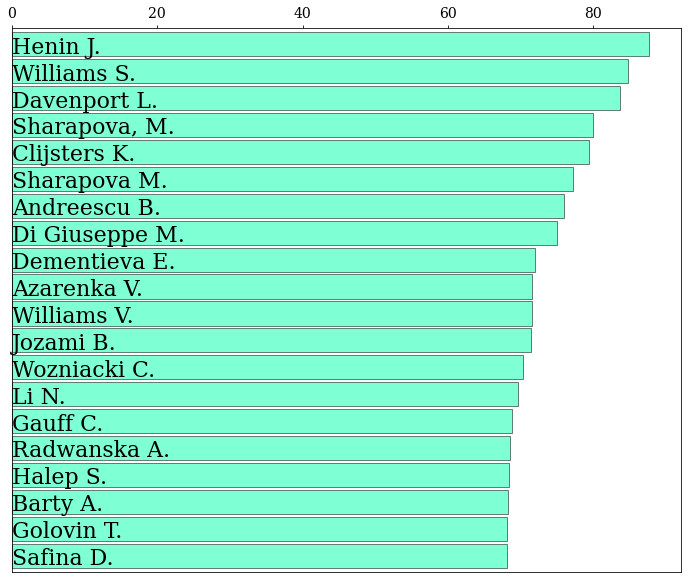

In [6]:
# Plot the 'naive' (ie in terms of percentage of victories) ranking of the top 20 players
plot_ranking(naive_ranking,naive_scores,20)

**(a)** Compute the transition matrix P as in the notes, then construct the matrix
$$
M = \alpha P + \frac{1-\alpha}{N} J
$$
where $J$ is the all-one matrix, and $\alpha = 0.99$.

**(b)** Compute the stationary distribution of the Markov chain of transition matrix $M$.

**(c)** Use the stationary distribution to rank the players, and plot the ranking of the best 20 players.

**(d)** Open-ended question. For this question, no particular answer is awaited. Investigate the data (and maybe the wikipedia pages of the players, even though you do not need to know their careers by heart!), do some plots, other rankings, to find possible explanations to the following observations (for the women rankings):

- How would you explain that Henin, who is N1 in term of percentage of victories is way behind in page-rankings?

- Recompute the ranking, but now with $\alpha=0.9$. How do you explain that Wozniacki is now ranked before Sharapova?

**(e)** Open-ended question.
In fact, both CSV files contain the score (the number of sets won by each of the players) of each game.
Propose a method based on PageRank, but with another transition matrix P, that takes the scores into account, in order to obtain more 'accurate' rankings and implement it.
There is no particular method expected. Your are only suppose to propose something 'coherent' (for instance winning games by a large margin should improve rankings...)

In [ ]:
# This code opens the game database
# it loops over all the games
# for each game it extracts the 'id' of the winner/loser
# and the number of sets won by each player

with open(tour+'.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)

    for row in reader:
        # each row corresponds to a game
        loser = player_ID[row[i_loser].rstrip().replace(',','')]   # ID of the loser
        winner = player_ID[row[i_winner].rstrip().replace(',','')] # ID of the winner
        
        # check if the number of sets for each player is available
        if row[i_loser+1] != '' and row[i_winner+1] != '':
            loser_sets = int(float(row[i_loser+1]))
            winner_sets = int(float(row[i_winner+1]))
            if winner_sets == 0:
                # For some games (where one of the players retired because of injury...)
                # The number of sets is 0. In that case we say that the winner won 2-0
                winner_sets = 2
                loser_sets = 0
        else:
            # if the number of sets are not available, we say that the winner won 2-0
            loser_sets = 0
            winner_sets = 2
            
        # Do something with loser_sets, winner_sets
        # ...
        # ...
        # ...

In [ ]:
# Implement your method